In [4]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy as sp
import scipy.stats as st
import pandas as pd
import copy
import random
import itertools
import operator
import seaborn as sns
import time

from SBD_SE_Methods import run_tests,condition_comparison
%matplotlib inline

In [3]:
#unpickle data
#load dataframes
dir='C:\Users\colinsh\Documents\DesignSim'
exp='sweep'
cent_o=pd.read_pickle('{}\{}\{}.pkl'.format(dir,exp,'cent_df'))
score_df=pd.read_pickle('{}\{}\{}.pkl'.format(dir,exp,'score_df'))

In [2]:
#Parameters from run
exp_l = [0.1, 1.0, 2.0]
tol_l = [.5, .7, .9]
rug_l = [0.0, 1.0, 2.0]
diss_l = [.1, .2, .3]
meth_l = ['iter', 'conv']
interval=5
iters=30
steps=60
save_nets=False
title='sweep'

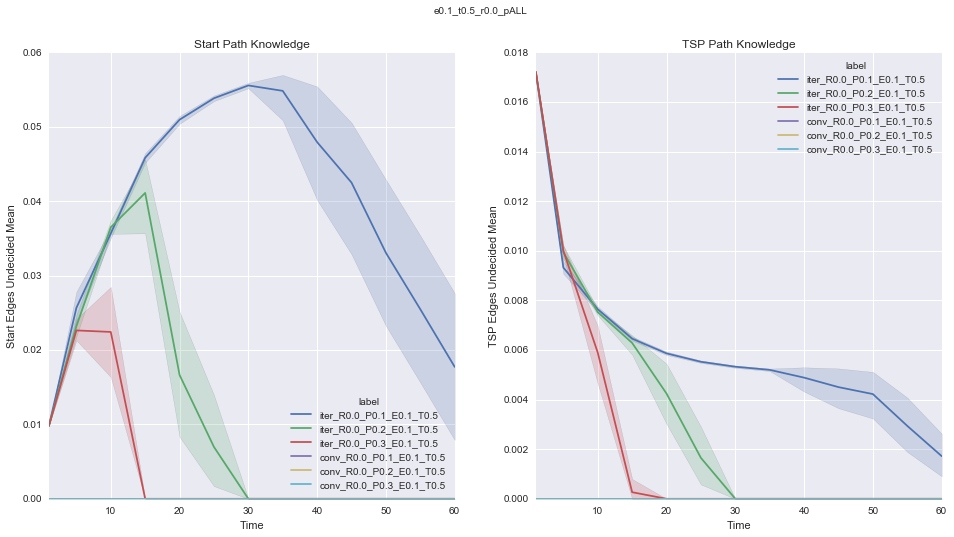

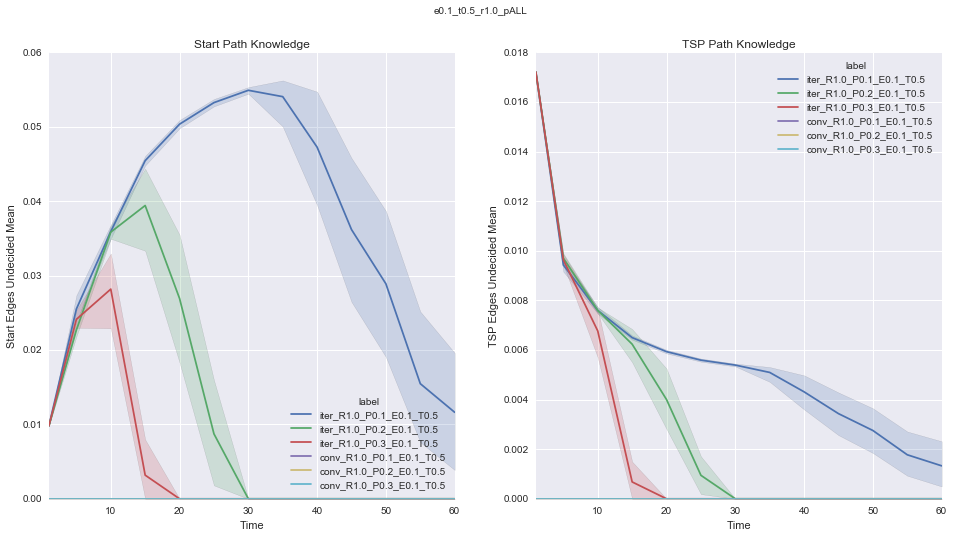

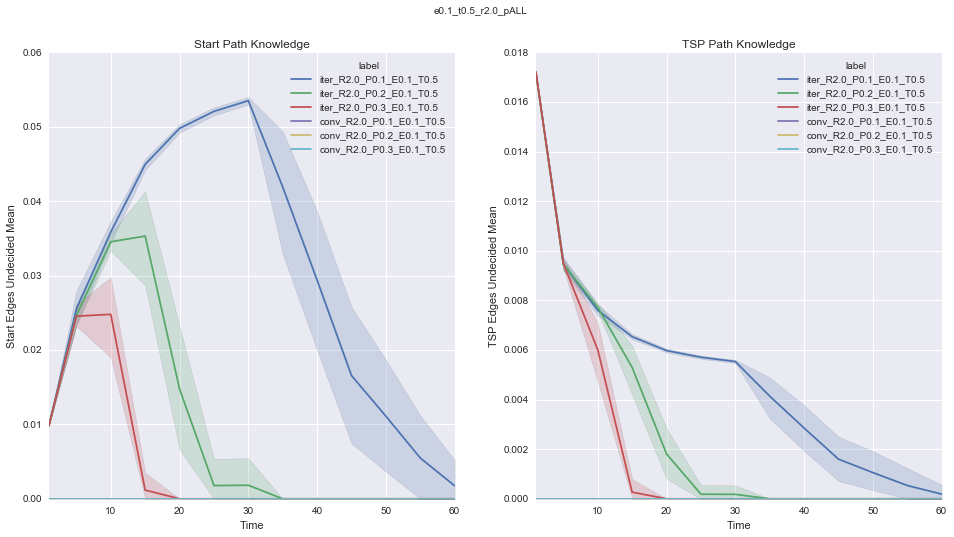

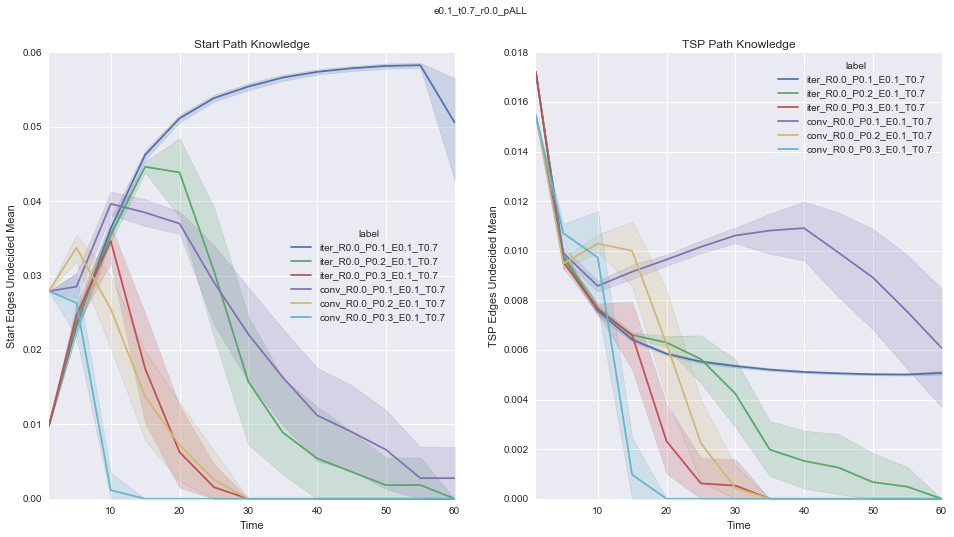

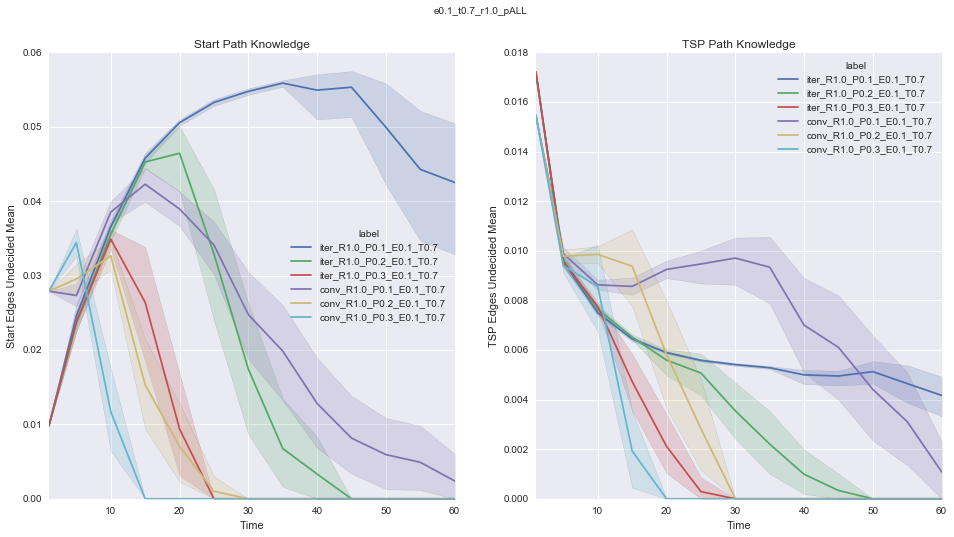

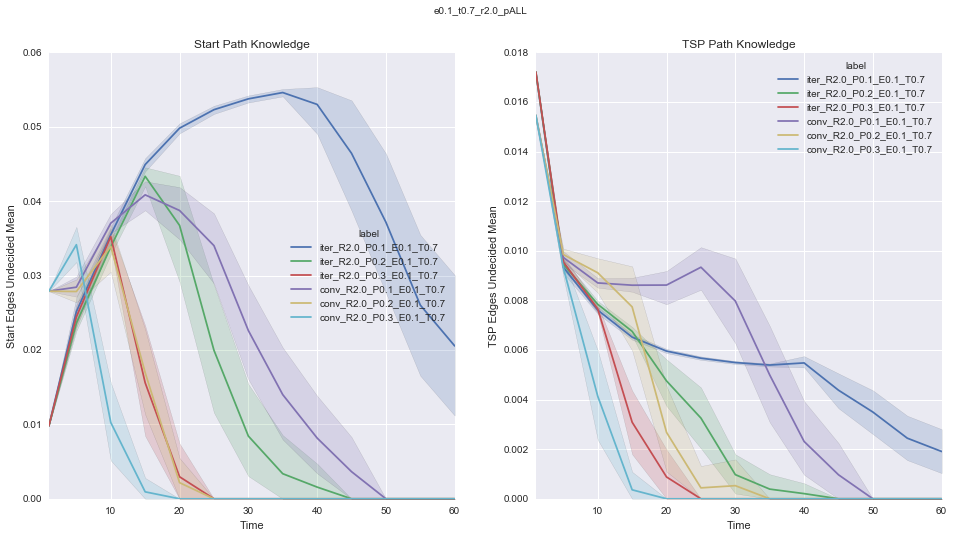

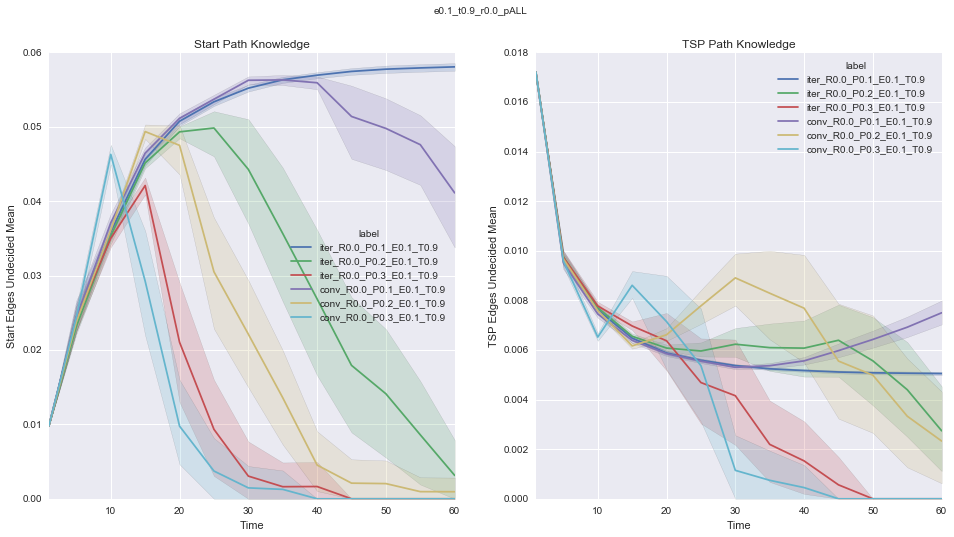

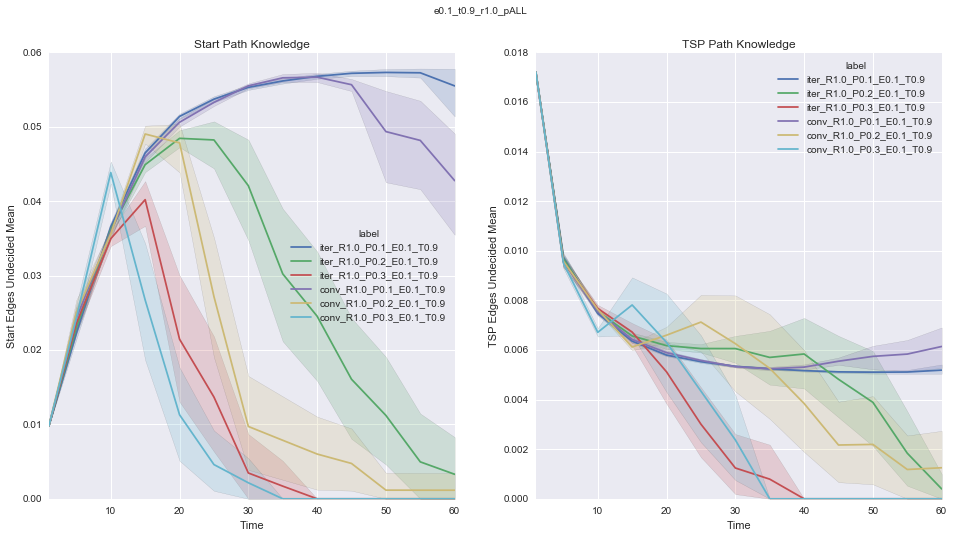

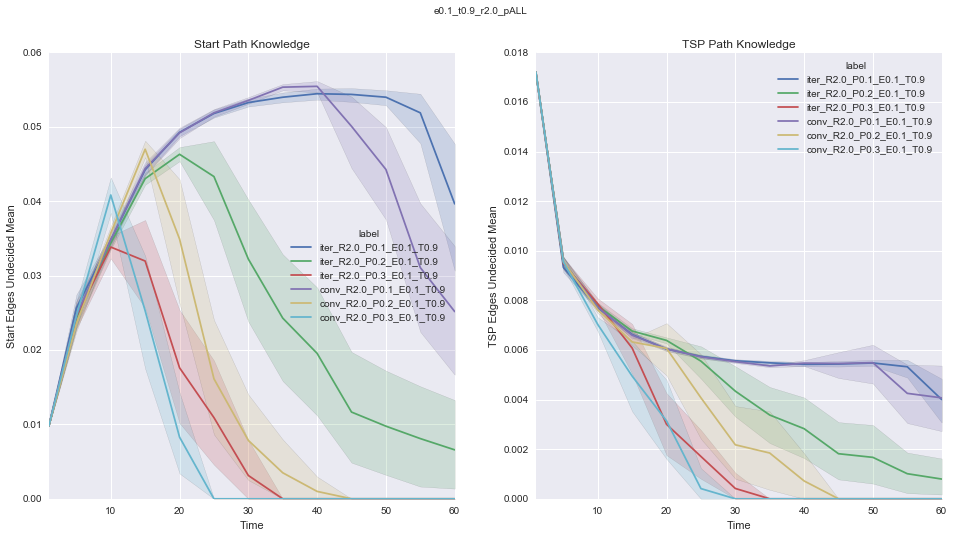

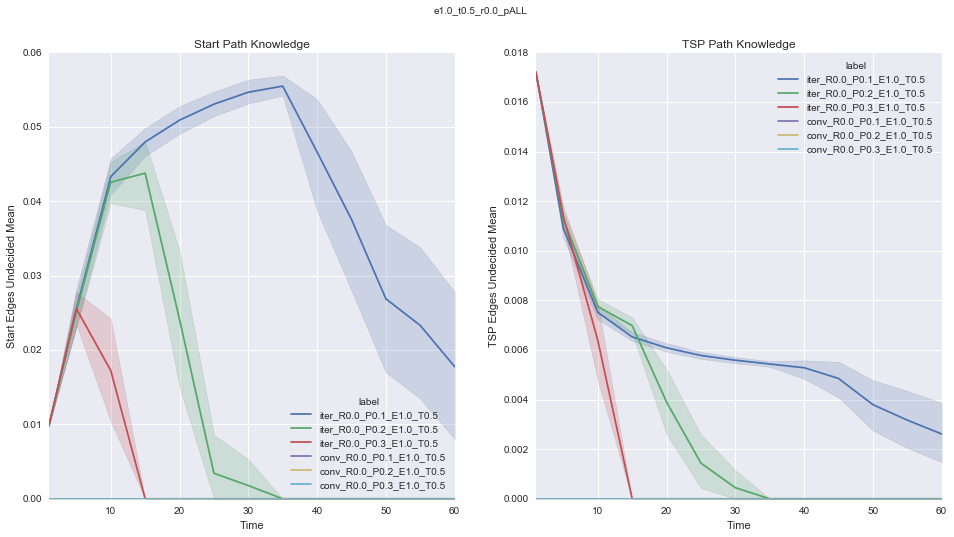

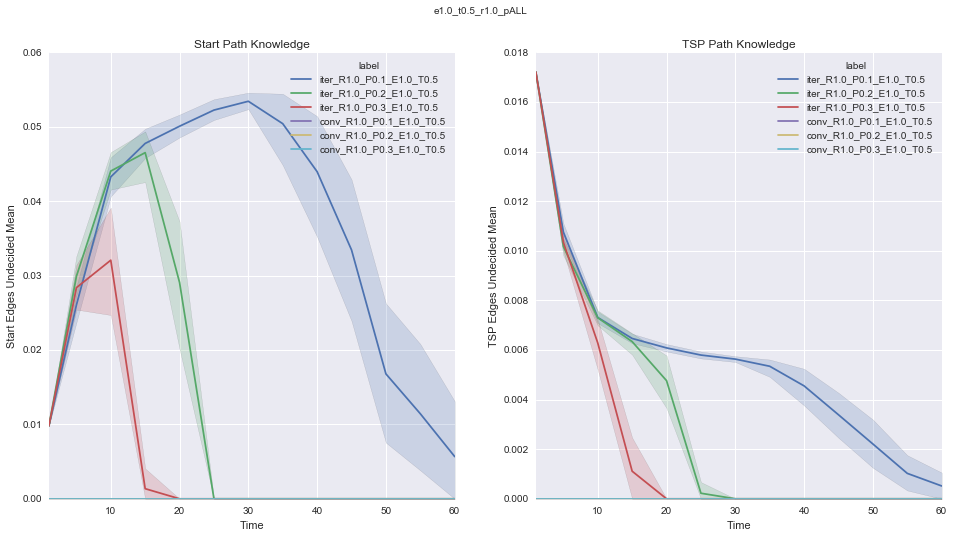

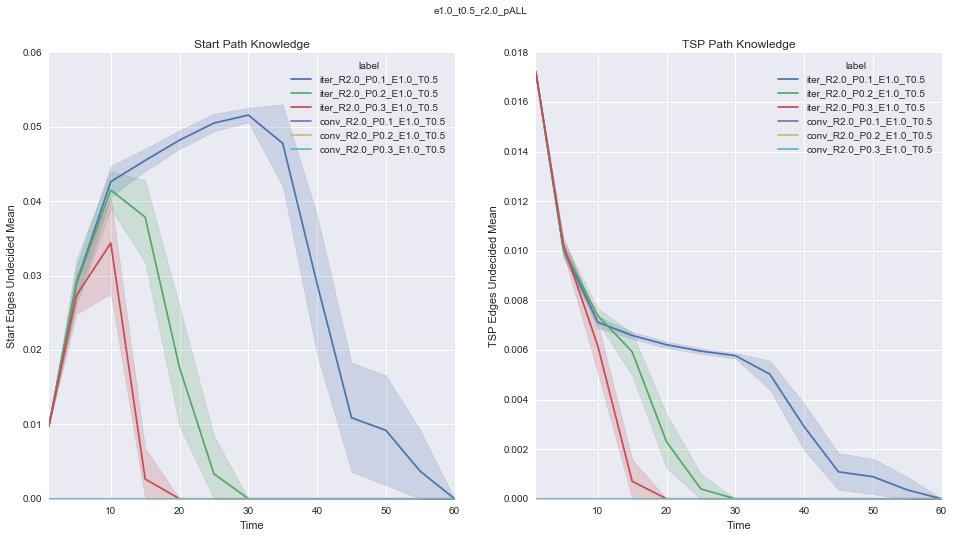

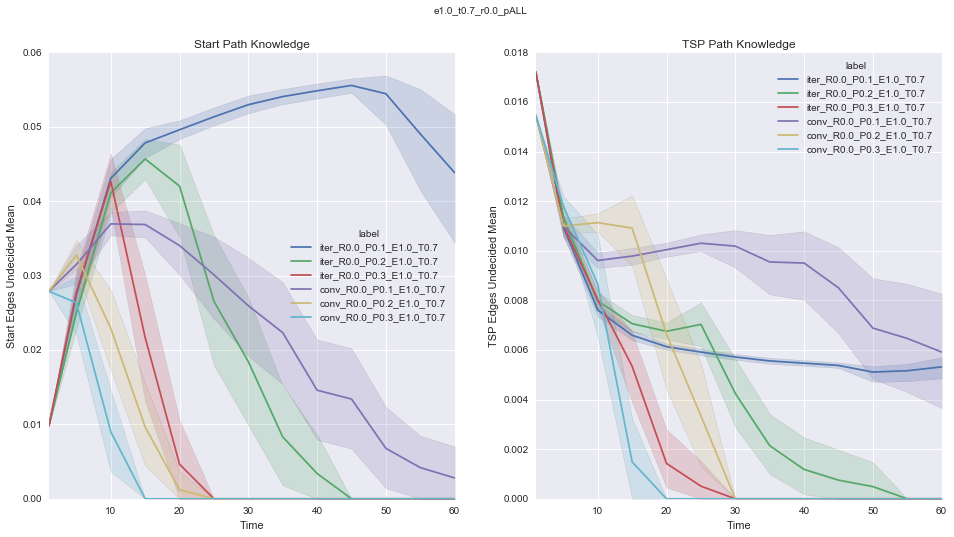

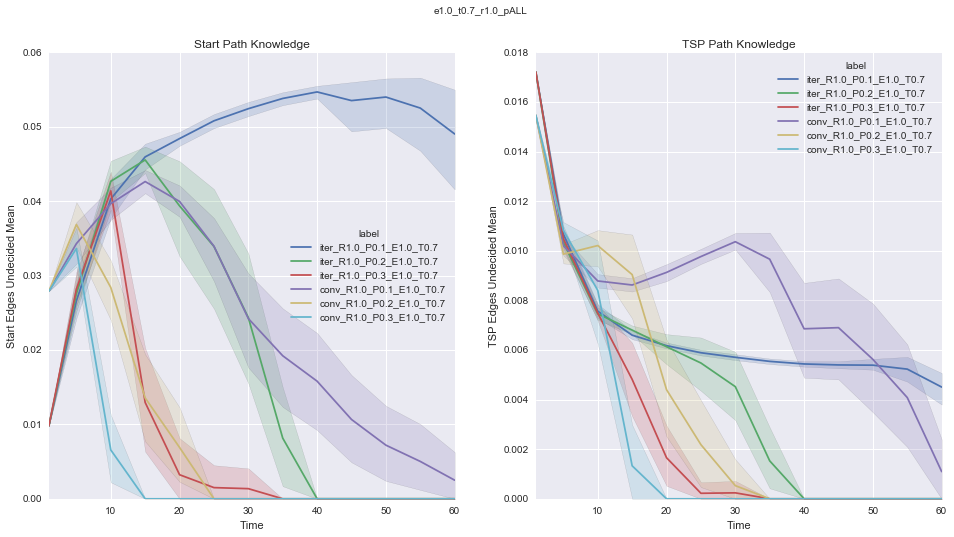

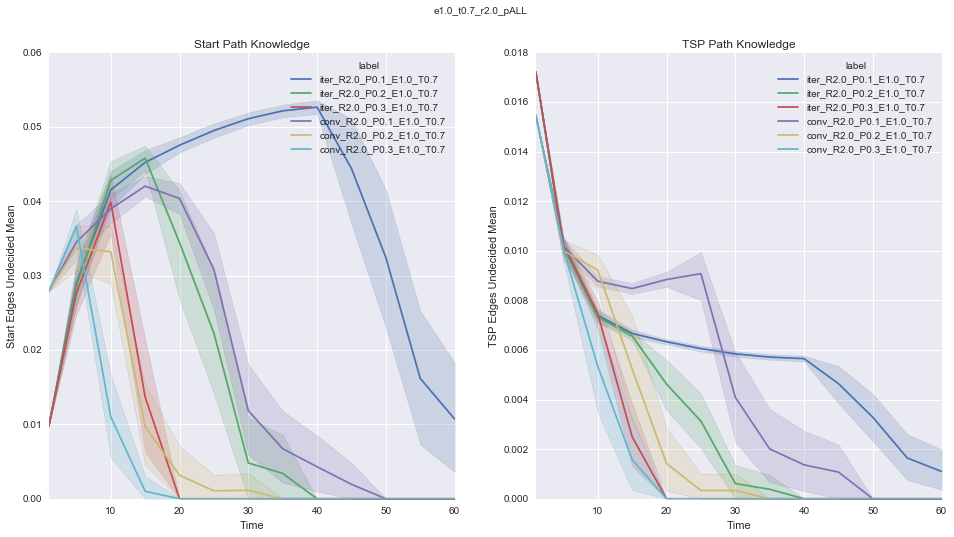

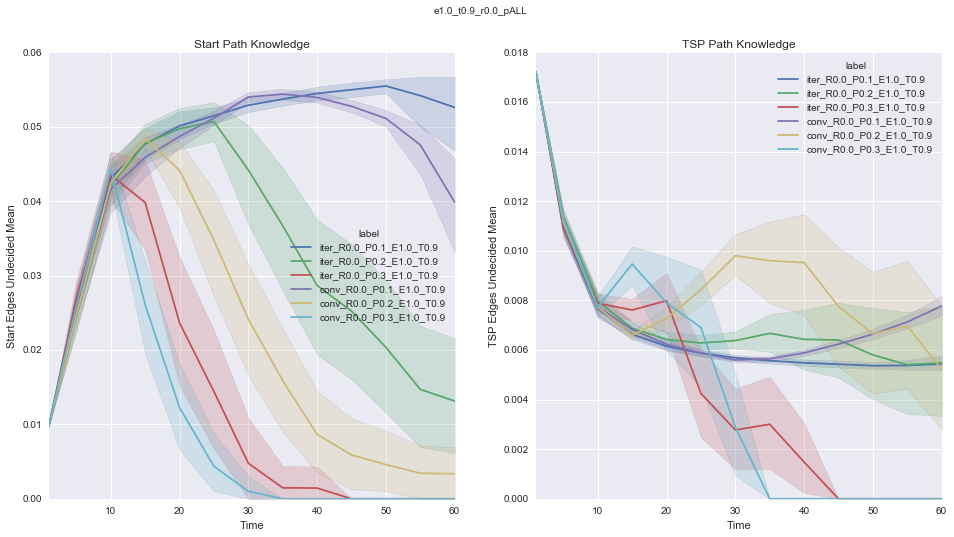

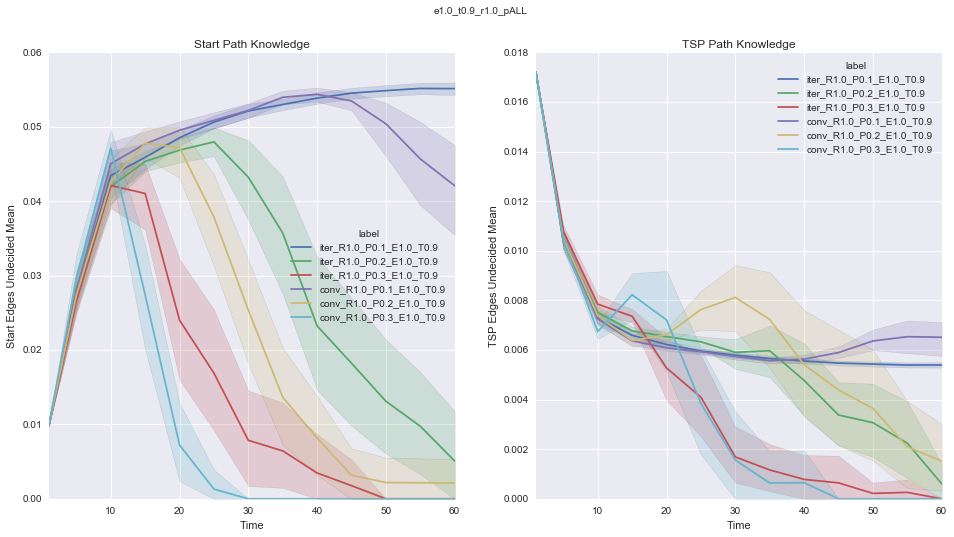

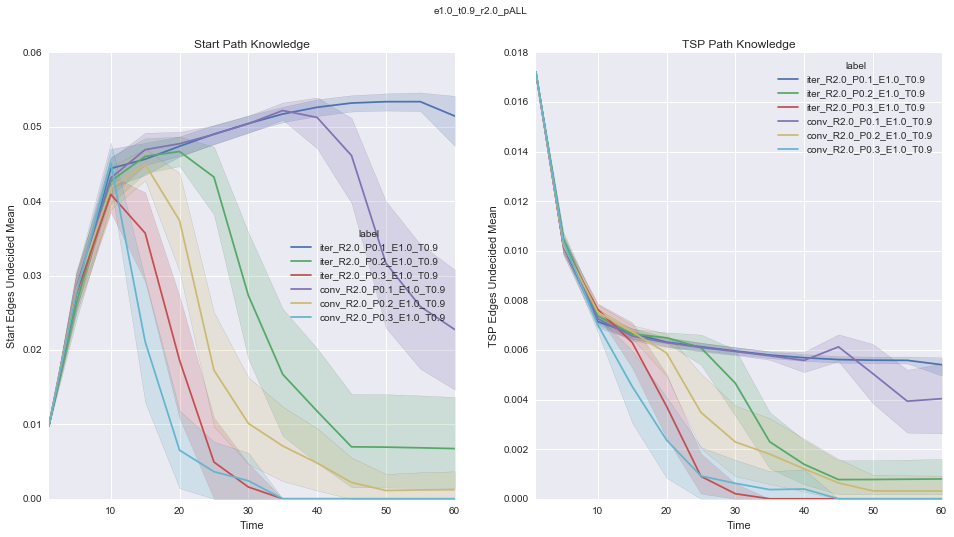

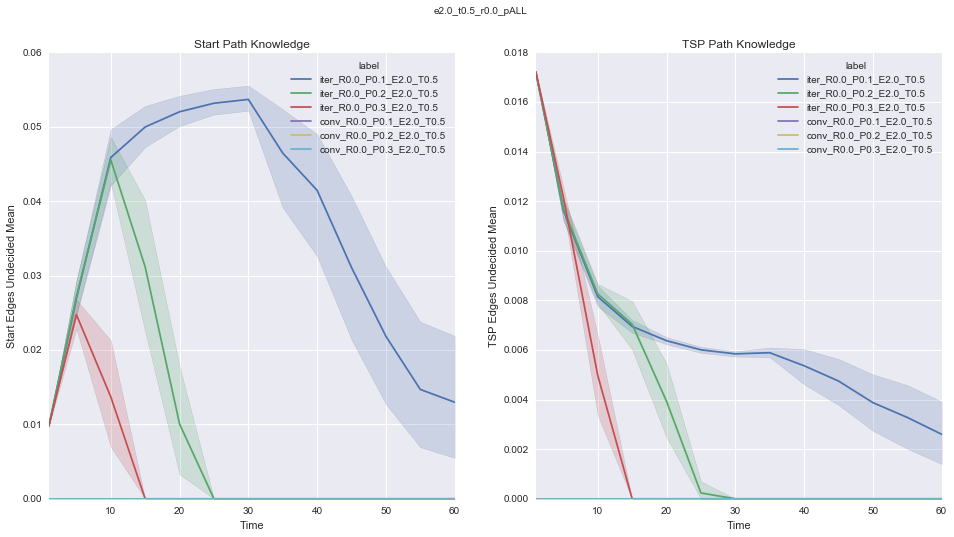

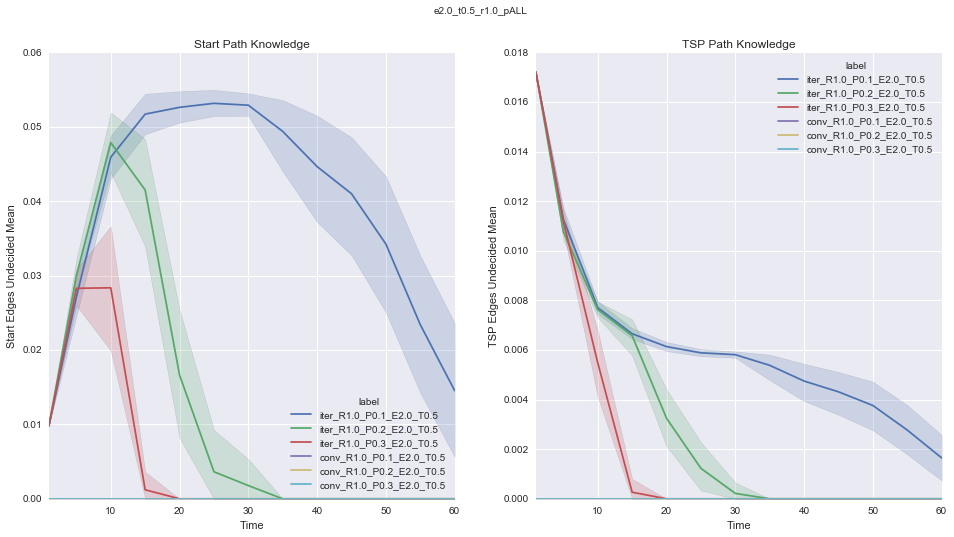

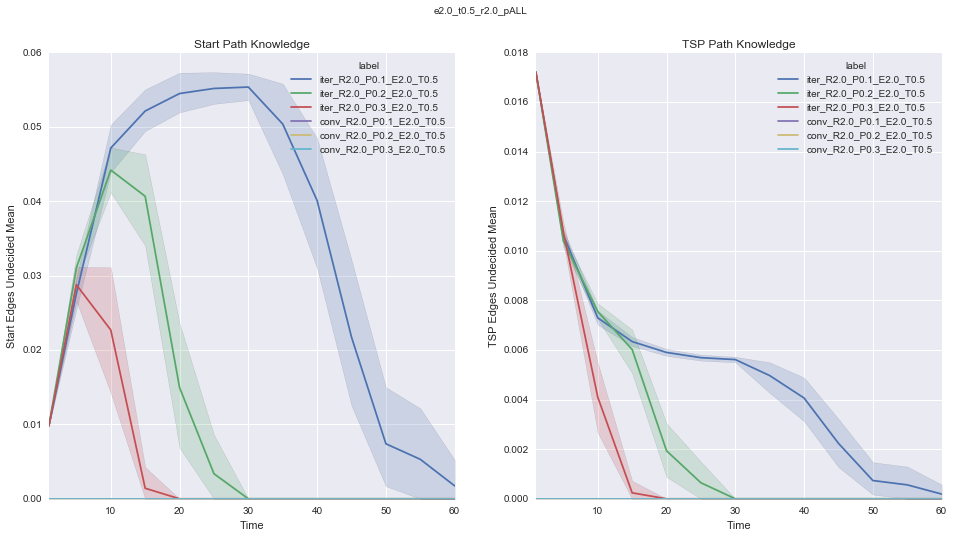

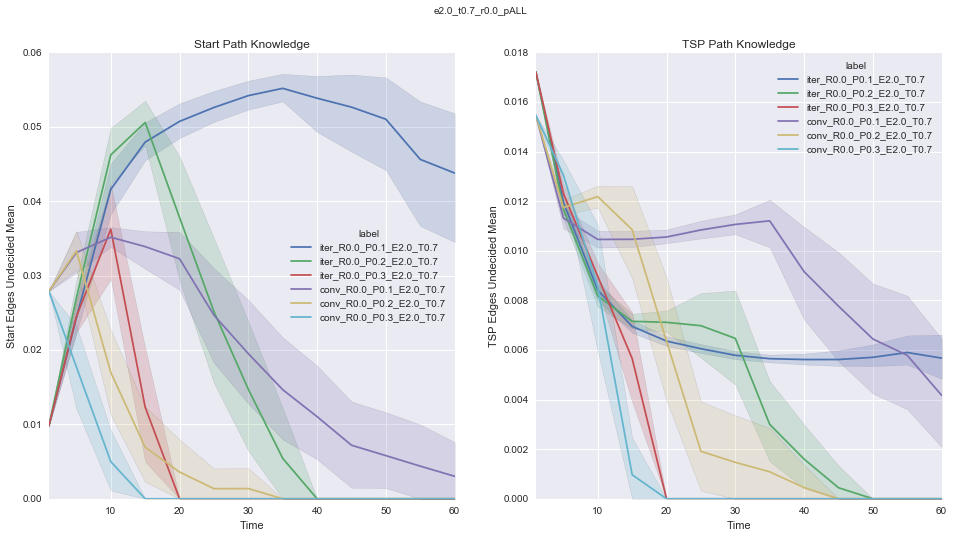

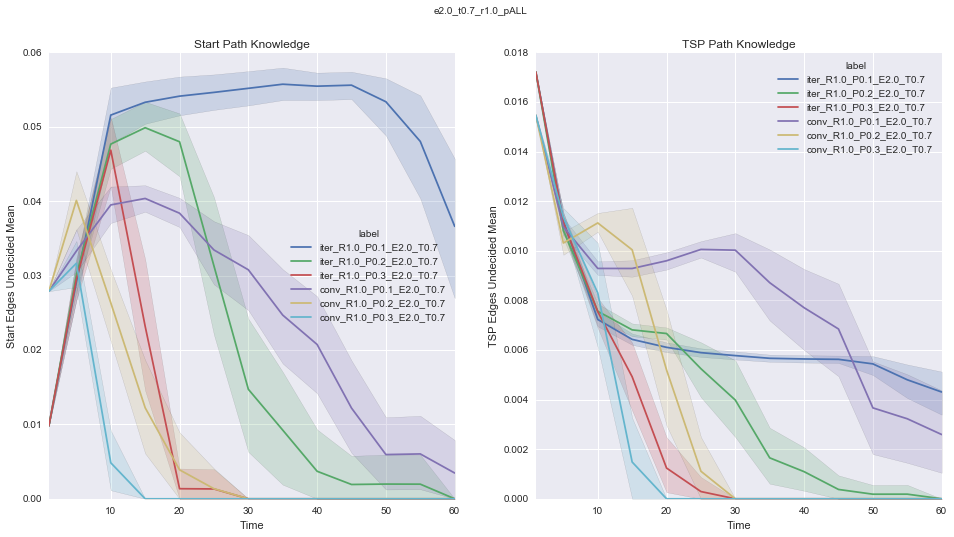

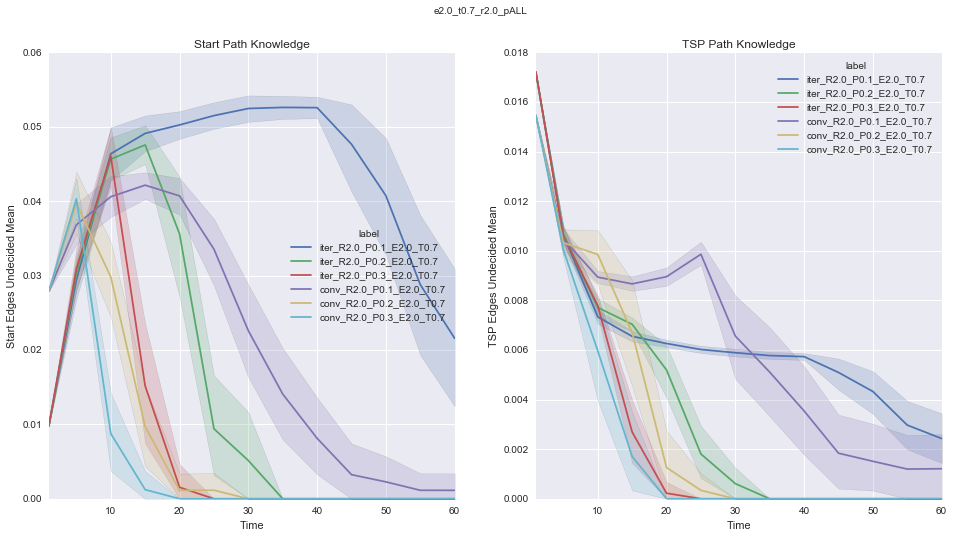

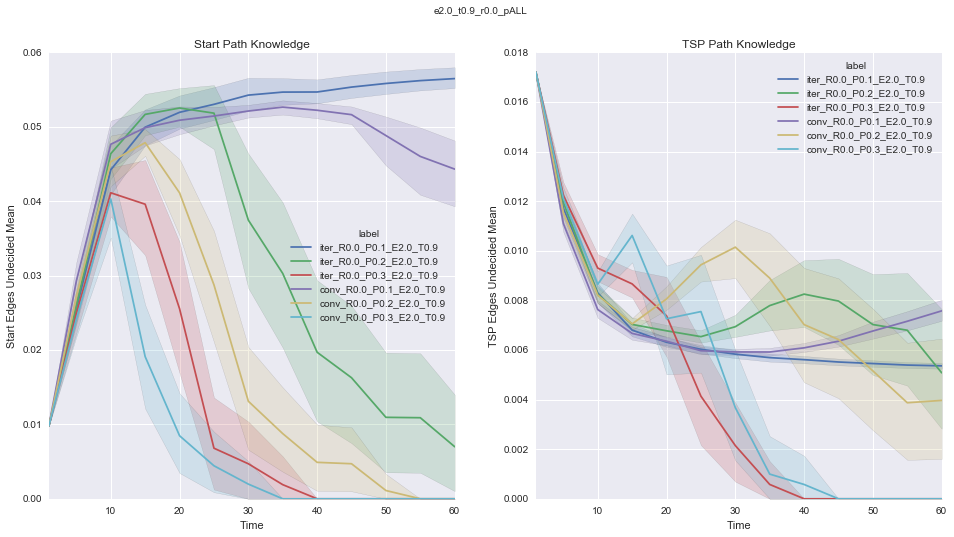

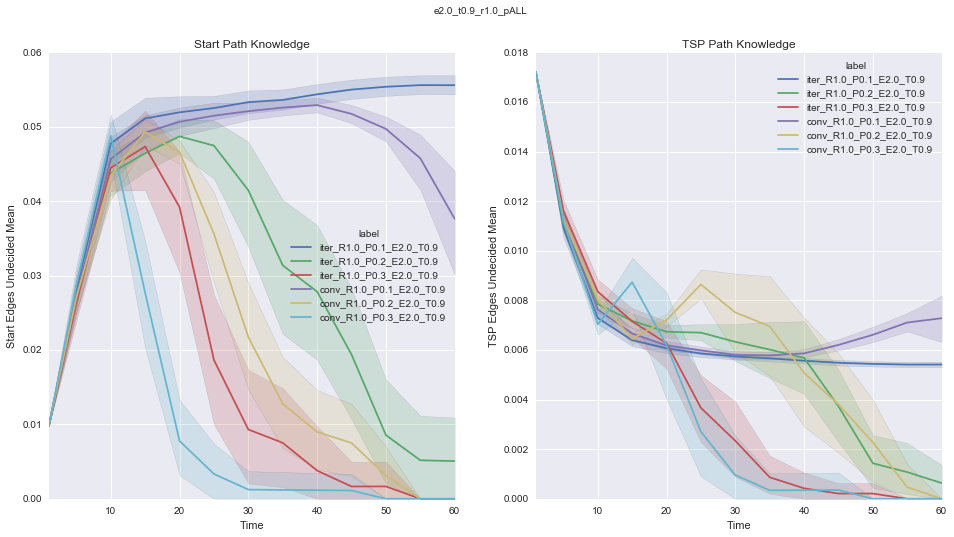

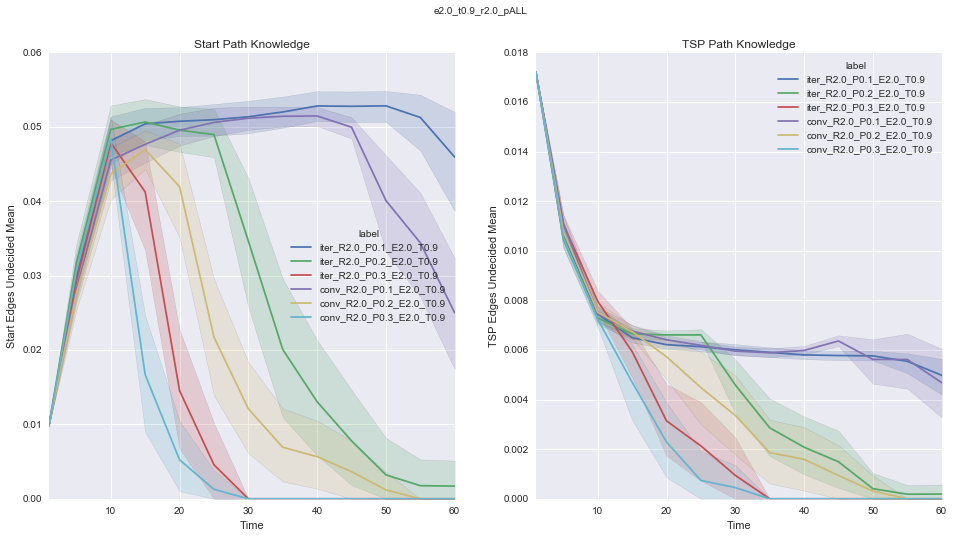

In [13]:
#data check
figsize=(16,8)
analysis='hits-h'
layer='k'
#for each parameter tuple, compare iterative vs. convergent design
for exp in exp_l:
    for tol in tol_l:
        for rug in rug_l:
            #compare all dissipations at once
            all_plot_df=cent_o.loc[(cent_o['centrality']==analysis) &
                                  (cent_o['layer']==layer) &
                                  (cent_o['exp']==exp) &
                                  (cent_o['tol']==tol) &
                                  (cent_o['rug']==rug)].reset_index(drop=True).fillna(0.0)
            f,a=plt.subplots(1,2,figsize=figsize)
            sns.tsplot(time='Time', value='Start Edges Undecided Mean', condition='label', unit='run', data=all_plot_df, ci=95, ax=a[0])
            sns.tsplot(time='Time', value='TSP Edges Undecided Mean', condition='label', unit='run', data=all_plot_df, ci=95, ax=a[1])
            a[0].set_title('Start Path Knowledge')
            a[1].set_title('TSP Path Knowledge')
            title='e{}_t{}_r{}_pALL'.format(exp,tol,rug)
            f.suptitle(title)
                    
            for diss in diss_l:
                #separates
                diss_plot_df=all_plot_df.loc[(all_plot_df['p']==diss)].reset_index(drop=True).fillna(0.0)
                f,a=plt.subplots(1,2,figsize=figsize)
                sns.tsplot(time='Time', value='Start Edges Undecided Mean', condition='label', unit='run', data=diss_plot_df, ci=95, ax=a[0])
                sns.tsplot(time='Time', value='TSP Edges Undecided Mean', condition='label', unit='run', data=diss_plot_df, ci=95, ax=a[1])
                a[0].set_title('Start Path Knowledge')
                a[1].set_title('TSP Path Knowledge')
                title='e{}_t{}_r{}_p{}'.format(exp,tol,rug,diss)